In [347]:
%matplotlib inline
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.datasets import make_blobs, make_moons

In [348]:
def add_intercept(X):
    # to simplify calculations we add ones column to data for multiplication with intercept
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def vizualize_linear_regression(X, y, theta):
    plt.scatter(X[:, 1], y, alpha=0.5)
    x_axis = np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01).reshape(-1, 1)
    y_axis = linear_predict(add_intercept(x_axis), theta)
    plt.plot(x_axis, y_axis, lw=2, c="r")
    plt.show()

def vizualize_logistic_regression(X, y, theta, treshold=0.5):
    plt.scatter(X[:, 1], X[:, 2], c=y, alpha=0.5)
    eps = 0.00000001
    x_axis = np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01).reshape(-1, 1)
    y_axis =  - (np.log((1-treshold)/treshold) + add_intercept(x_axis).dot(theta[:2])) / (theta[2] + eps)
    plt.plot(x_axis, y_axis, lw=2, c="r")
    plt.show()
    
def data_generator_linear_regression(n=100, intercept=0, coef=np.array([1]), var=0.1):
    X = np.random.rand(n, coef.shape[0]) 
    theta = np.insert(coef, 0, intercept)
    y = add_intercept(X).dot(theta) + np.random.normal(0, var, (n))
    return X, y

def data_generator_logistic_regression(n=100, data="blobs"):
    if data == "blobs":
        X, y = make_blobs(n, centers=2)
    elif data == "moons":
        X, y = make_moons(n)
    return X, y

# Linear regression

(2 points) Implement predictor for linear regression:
$$ h_\theta (X) = \theta^TX $$

In [349]:
def linear_predict(X, theta):
    return X @ theta

(3 points) Implement linear cost function:
$$ J(\theta) = \dfrac{1}{2n}\sum_{i=1}^{n}(h_\theta (X^{(i)})-y^{(i)})^2 $$

In [350]:
def linear_cost(X, y, theta):
    return np.sum(np.power((linear_predict(X, theta) - y), 2)) / (2 * len(X))

(3 points) Implement gradient function for linear regression:
$$\frac{\partial}{\partial \theta_j} J(\theta) = \dfrac{1}{n}\sum_{i=1}^{n}\left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)} $$

In [351]:
def linear_gradient(X, y, theta):
    return (linear_predict(X, theta)-y)/X.shape[0] @ X

(2 points) Implement weights initialization and weights update:
$$ \theta = \theta - \alpha \nabla_\theta J(\theta) $$

In [352]:
def fit_linear(X, y, lr=2, max_iter=100000, epsilon=0.0001, visualize=False):
    X = add_intercept(X)
    # randomly initialize weights vector with ones coresponding to X shape
    theta = np.random.rand(X.shape[1])
    cost = linear_cost(X, y, theta)
    cost_list = [cost]
    for i in range(max_iter):
        # update values of weights based on gradient
        theta -= linear_gradient(X, y, theta)
        cost = linear_cost(X, y, theta)
        cost_list.append(cost)
        print(cost)
        if visualize == True:
            time.sleep(0.1)
            clear_output(wait=True)
            vizualize_linear_regression(X, y, theta)
        
        if np.abs(cost_list[-1] - cost_list[-2]) < epsilon:
            break 
    print("theta", theta)
    print("cost", cost)
    return theta

(2 points) Try different parameters of lr and max_iter, what is optimal value? 
Experiment with different data generators.  
Write short summary on experiments.  
(In case of single dimensional data you can use vizualization.)

Ofcourse, changing `lr` and `max_iter` make situation a little bit better, but in my opinion, it is better to make epsilon solution much closer to needed result.

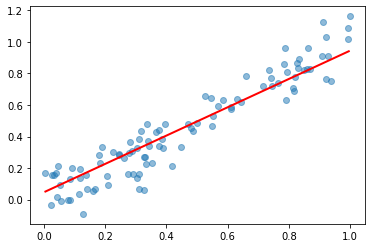

theta [0.04660231 0.89827117]
cost 0.005481292937278869


array([0.04660231, 0.89827117])

In [353]:
X, y = data_generator_linear_regression()
fit_linear(X, y, lr=0.01, visualize=True)

(4 points) Try to find coeficients just with linear algebra toolbox instead of optimization:

In [354]:
def least_squere(X, y):
   return np.linalg.lstsq(X, y)
X, y = data_generator_linear_regression()
least_squere(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([1.00338923]), array([0.98228235]), 1, array([5.94253268]))

(2 points) Compare precision of results and time of execution of least squered and optimization solutions  
Tip: Try to use *%timeit* from ipython magic

# Logistic regression 

(1 point) Implement sigmoid function:
$$ \sigma (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z}}  $$ 


In [355]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Vizualize sigmoid to check your code:

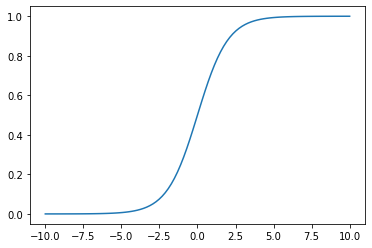

In [356]:
def vizualize_sigmoid(range_min=-10, range_max=10):
    x_axis = np.linspace(range_min,range_max,100)   
    y_axis = sigmoid(x_axis)
    plt.plot(x_axis,y_axis)
    plt.show()

vizualize_sigmoid()

(1 point) Implement predictor for logistic regression:
$$ h_\theta (X) = \sigma (\theta^TX) $$

In [357]:
def logistic_predict(X, theta):
    return sigmoid(X @ theta)

(2 points) Implement cross entropy cost function:
$$ J(\theta) = -\dfrac{1}{n}\sum_{i=1}^{n}(y^{(i)}*log(h_\theta (X^{(i)}))+(1−y^{(i)})*log(1−h_\theta (X^{(i)}))) $$

In [358]:
def logistic_cost(X, y, theta):
    e = 1e-5
    first = y * np.log(logistic_predict(X, theta) + e)
    second = (1-y) * np.log(1-logistic_predict(X, theta) + e)
    print(first)
    print(second)
    return np.sum(y * np.log(logistic_predict(X, theta) + e) + (1-y) * np.log(1-logistic_predict(X, theta) + e)) / (- len(X))
logistic_cost(X = np.array([
        [1, -0.5, 3, 1],
        [1, 8, -0.33, 5],
        [1, 0, 0, 0]
    ]), y = np.array([40, 100, 12]), theta = np.array([2, 5, 7, 9]))

[ 3.99997994e-04  9.99995000e-04 -1.52299989e+00]
[ 449.00409253 1139.77962103   23.39528536]


-536.8857996759949

(4 points) Calculate derivative from cross entropy and implement gradient step

In [359]:
def logistic_gradient(X, y, theta):
    return (logistic_predict(X, theta) - y) @ X / 3

(2 points) Similarly to previous example implement training procedure

In [360]:
def fit_logistic(X, y, lr=2, max_iter=10, epsilon=0.0001, visualize=False):
    pass

(2 points) Play with different parameters of lr and max_iter, try different datasets.  
Does algorithm always find optimal line for separation?   
What is a problem? How should optimal line look like to your mind?

In [361]:
X, y = data_generator_logistic_regression()

In [362]:
fit_logistic(X,y, lr=1, visualize=True)

In [363]:
import unittest

class LinearRegresionTests(unittest.TestCase):

    X = np.array([
        [1, -0.5, 3, 1],
        [1, 8, -0.33, 5],
        [1, 0, 0, 0]
    ])
    y = np.array([40, 100, 12])
    y_bin = np.array([0, 1, 0])
    theta = np.array([2, 5, 7, 9])
    eps = 0.001

    def assertFloatEquals(self, a, b):
        self.assertTrue(np.abs(a - b) < self.eps)
    
    def assertArrayEquals(self, a, b):
        a = np.array(a)
        b = np.array(b)
        self.assertEqual(a.shape, b.shape)
        self.assertTrue(np.all(np.abs(a - b) < self.eps))
    
    def test_linear_predict_for_single_example(self):
        expected = 29.5
        actual = linear_predict(self.X[0], self.theta)
        self.assertFloatEquals(actual, expected)
    
    def test_linear_predict_for_multiple_examples(self):
        expected = [29.5, 84.69, 2.]
        actual = linear_predict(self.X, self.theta)
        self.assertArrayEquals(actual, expected)
        
    def test_linear_cost(self):
        expected = 74.107
        actual = linear_cost(self.X, self.y, self.theta)
        self.assertFloatEquals(actual, expected)
        
    def test_linear_gradient(self):
        expected = [-11.936, -39.076, -8.815, -29.016]
        actual = linear_gradient(self.X, self.y, self.theta)
        self.assertArrayEquals(actual, expected)
    
    def test_sigmoid(self):
        expected = [1., 1., 0.999]
        actual = sigmoid(self.y)
        self.assertArrayEquals(actual, expected)
    
    def test_logistic_predict_for_single_example(self):
        expected = 0.88
        actual = logistic_predict(self.X[2], self.theta)
        self.assertFloatEquals(actual, expected)
    
    def test_logistic_predict_for_multiple_examples(self):
        expected = [1, 1, 0.88]
        actual = logistic_predict(self.X, self.theta)
        self.assertArrayEquals(actual, expected)
        
    def test_logistic_cost(self):
        expected = 4.546
        actual = logistic_cost(self.X, self.y_bin, self.theta)
        self.assertFloatEquals(actual, expected)
        
    def test_logistic_gradient(self):
        expected = [0.626, -0.166,  1, 0.333]
        actual = logistic_gradient(self.X, self.y_bin, self.theta)
        self.assertArrayEquals(actual, expected)

In [364]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_linear_cost (__main__.LinearRegresionTests) ... ok
test_linear_gradient (__main__.LinearRegresionTests) ... ok
test_linear_predict_for_multiple_examples (__main__.LinearRegresionTests) ... ok
test_linear_predict_for_single_example (__main__.LinearRegresionTests) ... ok
test_logistic_cost (__main__.LinearRegresionTests) ... ok
test_logistic_gradient (__main__.LinearRegresionTests) ... ok
test_logistic_predict_for_multiple_examples (__main__.LinearRegresionTests) ... ok
test_logistic_predict_for_single_example (__main__.LinearRegresionTests) ... ok
test_sigmoid (__main__.LinearRegresionTests) ... 

[ 0.00000e+00  9.99995e-06 -0.00000e+00]
[-11.51292545  -0.          -2.12684412]


ok

----------------------------------------------------------------------
Ran 9 tests in 0.012s

OK
